In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [4]:
dengue = pd.read_csv('datasets\\dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

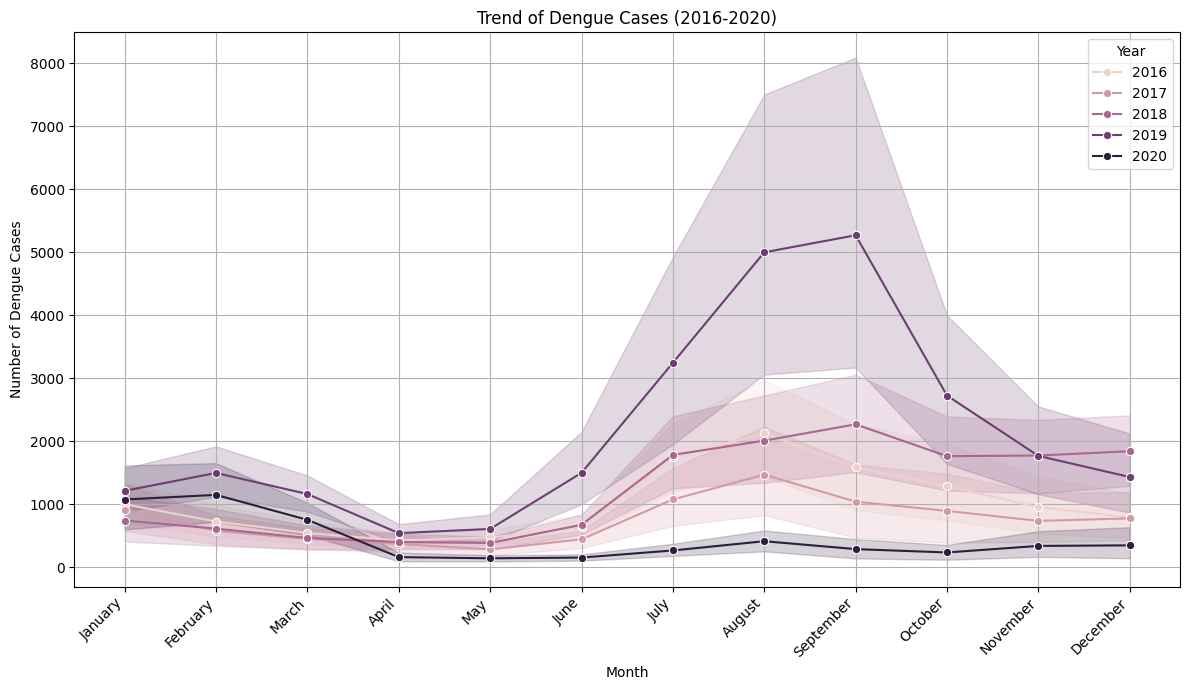

In [30]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
# plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o')
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.gcf().set_size_inches(12,7)
plt.tight_layout()
plt.show()

In [ ]:
INSIGHT : 

In [14]:
dengue.dtypes

Month            category
Year                int64
Region             object
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [68]:
monthly_deaths = dengue.groupby(['Month', 'Year'])["Dengue_Deaths"].sum().unstack()
monthly_deaths

Year,2016,2017,2018,2019,2020
Month,,,,,
January,73,95,65,94,67
February,43,64,43,101,64
March,47,36,58,103,47
April,40,43,41,59,17
May,41,23,31,56,11
June,69,42,78,119,14
July,123,74,153,232,29
August,132,111,156,280,35
September,3418,1826,185,377,342


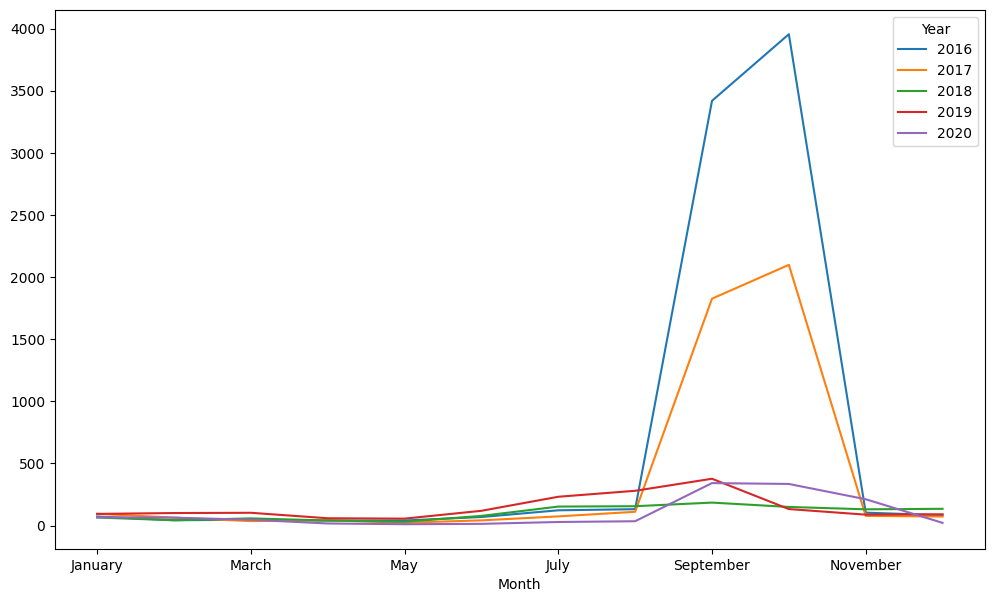

In [69]:
monthly_deaths.plot(kind='line')
plt.gcf().set_size_inches(12,7)